### Taller de Canalización

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import zipfile
import random
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
raiz = '/content/gdrive/MyDrive/Colab Notebooks/'
zip_ref = zipfile.ZipFile(raiz+'senas.zip', 'r')
zip_ref.extractall(raiz+'senas/imgs')
zip_ref.close()

In [6]:
len(os.listdir(raiz+'senas/imgs'))

21

In [9]:
tt = os.listdir(raiz+'senas/imgs') 

for x in tt:
    print(x +" tiene ", len(os.listdir(raiz+'senas/imgs/'+x)), ' imágenes.')

a tiene  200  imágenes.
b tiene  200  imágenes.
c tiene  200  imágenes.
d tiene  200  imágenes.
e tiene  200  imágenes.
f tiene  200  imágenes.
i tiene  200  imágenes.
k tiene  200  imágenes.
l tiene  200  imágenes.
m tiene  200  imágenes.
n tiene  200  imágenes.
o tiene  200  imágenes.
p tiene  200  imágenes.
q tiene  200  imágenes.
r tiene  200  imágenes.
t tiene  200  imágenes.
u tiene  200  imágenes.
v tiene  200  imágenes.
w tiene  200  imágenes.
x tiene  200  imágenes.
y tiene  200  imágenes.


In [12]:
# Creación de las carpetas train y test con las categorías

os.mkdir(raiz+'senas/train')
os.mkdir(raiz+'senas/test')
for x in tt:
    os.mkdir(raiz+'senas/train/'+x)
    os.mkdir(raiz+'senas/test/'+x)

In [13]:
# Función split para dividir los datos en las carpetas train y test

def split(source, traindir, testdir, size): # size está entre 0 y 1
    files = []
    for file in os.listdir(source):
        if os.path.getsize(source + file) > 0:
            files.append(file)
        else:
            print(file + ' es vacío, se omite.')
    
    s = int(len(files)*size)
    shuffled = random.sample(files, len(files)) # Desorganiza las files
    trainfiles = shuffled[:s]
    testfiles = shuffled[s:]
    
    for file in trainfiles:
        copyfile(source+file, traindir+file)
        
    for file in testfiles:
        copyfile(source+file, testdir+file)   
    
    

In [14]:
# Aplicación de la función anterior

for x in tt:
    split(raiz+'senas/imgs/'+x+'/', raiz+'senas/train/'+x+'/', raiz+'senas/test/'+x+'/', 0.9)

### Modelo

In [68]:
 model0=tf.keras.models.load_model(raiz+'senas/senas.h5') # Carga un modelo guardado anteriormente
 w = model0.get_weights() # Guarda los pesos del modelo anterior

 # Para más info https://www.tensorflow.org/guide/keras/save_and_serialize?hl=es

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(tt), activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.set_weights(w) # Setea los pesos de un modelo anterior

In [71]:
TRAINING_DIR = raiz+"senas/train/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = raiz+"senas/test/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 3780 images belonging to 21 classes.
Found 420 images belonging to 21 classes.


In [72]:
# Note that this may take some time.
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
38/38 [==============================] - 125s 3s/step - loss: 1.8040 - accuracy: 0.4487 - val_loss: 1.4759 - val_accuracy: 0.5095
Epoch 2/15
38/38 [==============================] - 121s 3s/step - loss: 1.4961 - accuracy: 0.5091 - val_loss: 1.3365 - val_accuracy: 0.5286
Epoch 3/15
38/38 [==============================] - 121s 3s/step - loss: 1.4420 - accuracy: 0.5274 - val_loss: 1.3651 - val_accuracy: 0.5452
Epoch 4/15
38/38 [==============================] - 117s 3s/step - loss: 1.4570 - accuracy: 0.5041 - val_loss: 1.4040 - val_accuracy: 0.5310
Epoch 5/15
38/38 [==============================] - 116s 3s/step - loss: 1.3897 - accuracy: 0.5422 - val_loss: 1.3072 - val_accuracy: 0.5595
Epoch 6/15
38/38 [==============================] - 116s 3s/step - loss: 1.3542 - accuracy: 0.5475 - val_loss: 1.3530 - val_accuracy: 0.5405
Epoch 7/15
38/38 [==============================] - 115s 3s/step - loss: 1.3540 - accuracy: 0.5447 - val_loss: 1.4207 - val_accuracy: 0.5405
Epoch 8/15
38

In [73]:
model.save(raiz+'senas/senas.h5') # Guarda el modelo con sus pesos

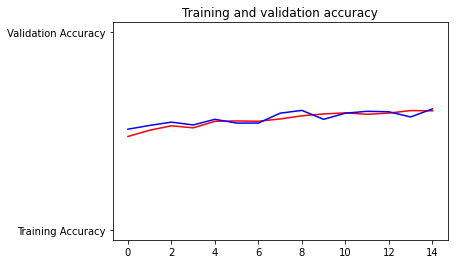

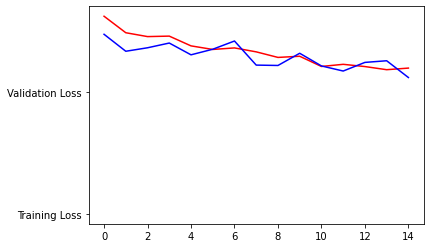

In [74]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()
# Desired output. Charts with training and validation metrics. No crash :)



In [75]:


# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(len(classes[0]))

  for x in range(len(tt)):
    if classes[0,x] > 0.5:
      print(fn+' es '+tt[x])
      break
 

Saving i_008.jpg to i_008 (2).jpg
Saving i_009.jpg to i_009 (2).jpg
Saving i_010.jpg to i_010 (2).jpg
Saving i_011.jpg to i_011 (2).jpg
Saving i_012.jpg to i_012 (1).jpg
Saving i_013.jpg to i_013 (2).jpg
Saving i_014.jpg to i_014 (1).jpg
Saving i_015.jpg to i_015 (1).jpg
Saving i_016.jpg to i_016 (1).jpg
Saving i_017.jpg to i_017 (1).jpg
Saving i_018.jpg to i_018 (1).jpg
Saving i_019.jpg to i_019 (1).jpg
21
i_008.jpg es f
21
21
i_010.jpg es d
21
21
i_012.jpg es d
21
i_013.jpg es d
21
21
21
21
i_017.jpg es i
21
21
i_019.jpg es u
